In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [371]:
X_train = pd.read_csv("XTrain.csv", encoding="unicode_escape")
X_train = X_train.drop(['Index'], axis=1)
X_test = pd.read_csv("XTest.csv", encoding="unicode_escape")
X_test = X_test.drop(['Index'], axis=1)
y_train = pd.read_csv("yTrain.csv", encoding="unicode_escape")
y_train = y_train.drop(['Index'], axis=1)

In [3]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,6132.0,11.520059,6.922062,0.0,5.0,12.00,17.00,23.00
Temperature(Â°C),6132.0,13.002658,11.921261,-17.5,3.5,13.90,22.70,39.30
Humidity(%),6132.0,58.096053,20.384153,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),6132.0,1.729958,1.045960,0.0,0.9,1.50,2.40,7.30
Visibility (10m),6132.0,1440.791422,606.076776,27.0,946.0,1706.50,2000.00,2000.00
Dew point temperature(Â°C),6132.0,4.141813,13.047188,-30.5,-4.7,5.10,14.90,26.80
Solar Radiation (MJ/m2),6132.0,0.578255,0.874270,0.0,0.0,0.01,0.96,3.52
Rainfall(mm),6132.0,0.158040,1.227656,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),6132.0,0.071836,0.431092,0.0,0.0,0.00,0.00,8.80


In [25]:
X_train.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

/var/folders/n1/d4n7cl592tv868mtdj6zh25h0000gn/T/ipykernel_1666/1678480693.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()


,Functioning Day,Rented Bike Count
0,Yes,4374904
1,No,0


In [290]:
X_train['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [372]:
X_train['Date'] = pd.to_datetime(X_train['Date'], dayfirst=True) 
X_train['Day'] = X_train['Date'].dt.day
X_train['Month'] = X_train['Date'].dt.month
X_train['Year'] = X_train['Date'].dt.year

X_test['Date'] = pd.to_datetime(X_test['Date'],dayfirst=True) 
X_test['Day'] = X_test['Date'].dt.day
X_test['Month'] = X_test['Date'].dt.month
X_test['Year'] = X_test['Date'].dt.year

X_train.drop(columns=['Date'],inplace=True)
X_test.drop(columns=['Date'],inplace=True)

In [34]:
X_train

,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,5,10.2,73,0.8,1137,5.5,0.00,0.0,0.0,Spring,No Holiday,Yes,26,4,2018
1,7,15.1,80,1.0,623,11.6,0.01,0.0,0.0,Spring,No Holiday,Yes,2,4,2018
2,8,17.1,57,1.7,792,8.5,1.21,0.0,0.0,Spring,No Holiday,Yes,25,5,2018
3,22,2.7,88,2.0,621,0.9,0.00,0.0,0.0,Spring,No Holiday,Yes,8,4,2018
4,17,6.3,50,4.4,707,-3.3,0.64,0.0,0.0,Spring,No Holiday,Yes,6,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,15,27.8,41,1.6,1851,13.3,2.89,0.0,0.0,Summer,No Holiday,Yes,16,6,2018
6128,22,28.0,76,1.5,1542,23.3,0.00,0.0,0.0,Summer,No Holiday,Yes,19,7,2018
6129,20,25.3,32,2.2,1997,7.4,0.06,0.0,0.0,Summer,No Holiday,Yes,3,6,2018
6130,22,29.1,77,3.0,1559,24.6,0.00,0.0,0.0,Summer,No Holiday,Yes,5,8,2018


In [368]:
from sklearn.preprocessing import OrdinalEncoder

le_seasons = OrdinalEncoder().fit(X_train[['Seasons']])
X_train['Seasons'] = le_seasons.transform(X_train[['Seasons']])
X_test['Seasons'] = le_seasons.transform(X_test[['Seasons']])

le_holiday = OrdinalEncoder().fit(X_train[['Holiday']])
X_train['Holiday'] = le_holiday.transform(X_train[['Holiday']])
X_test['Holiday'] = le_holiday.transform(X_test[['Holiday']])

le_func_day = OrdinalEncoder().fit(X_train[['Functioning Day']])
X_train['Functioning Day'] = le_func_day.transform(X_train[['Functioning Day']])
X_test['Functioning Day'] = le_func_day.transform(X_test[['Functioning Day']])

In [373]:
from sklearn.preprocessing import OneHotEncoder

le_seasons = OneHotEncoder(handle_unknown='ignore').fit(X_train[['Seasons']])
# le_seasons.categories_
# a=le_seasons.transform(X_train[['Seasons']])
X_train = X_train.join(pd.DataFrame(le_seasons.transform(X_train[['Seasons']]).toarray(), columns=['Autumn', 'Spring', 'Summer', 'Winter']))
X_test = X_test.join(pd.DataFrame(le_seasons.transform(X_train[['Seasons']]).toarray(), columns=['Autumn', 'Spring', 'Summer', 'Winter']))
X_train.drop(columns=['Seasons'],inplace=True)
X_test.drop(columns=['Seasons'],inplace=True)

le_holiday = OneHotEncoder(handle_unknown='ignore').fit(X_train[['Holiday']])
X_train = X_train.join(pd.DataFrame(le_holiday.transform(X_train[['Holiday']]).toarray(), columns=['No Holiday', 'Holiday1']))
X_test = X_test.join(pd.DataFrame(le_holiday.transform(X_train[['Holiday']]).toarray(), columns=['No Holiday', 'Holiday1']))
X_train.drop(columns=['Holiday'],inplace=True)
X_test.drop(columns=['Holiday'],inplace=True)

le_func_day = OneHotEncoder(handle_unknown='ignore').fit(X_train[['Functioning Day']])
X_train = X_train.join(pd.DataFrame(le_func_day.transform(X_train[['Functioning Day']]).toarray(), columns=['Non Functioning Day', 'Functioning Day1']))
X_test = X_test.join(pd.DataFrame(le_func_day.transform(X_train[['Functioning Day']]).toarray(), columns=['Non Functioning Day', 'Functioning Day1']))
X_train.drop(columns=['Functioning Day'],inplace=True)
X_test.drop(columns=['Functioning Day'],inplace=True)

# hour_columns = [f"Hour_{x}" for x in range(24)]

# le_hour = OneHotEncoder(handle_unknown='ignore').fit(X_train[['Hour']])
# X_train = X_train.join(pd.DataFrame(le_hour.transform(X_train[['Hour']]).toarray(), columns=hour_columns))
# X_test = X_test.join(pd.DataFrame(le_hour.transform(X_train[['Hour']]).toarray(), columns=hour_columns))
# X_train.drop(columns=['Hour'],inplace=True)
# X_test.drop(columns=['Hour'],inplace=True)

In [341]:
X_train.head()

,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,10.2,73,0.8,1137,5.5,0.00,0.0,0.0,26,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.1,80,1.0,623,11.6,0.01,0.0,0.0,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.1,57,1.7,792,8.5,1.21,0.0,0.0,25,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.7,88,2.0,621,0.9,0.00,0.0,0.0,8,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.3,50,4.4,707,-3.3,0.64,0.0,0.0,6,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0)
varModel.fit(X_train)
constArr=varModel.get_support()
constArr
# import collections
# collections.Counter(constArr)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

<AxesSubplot:>

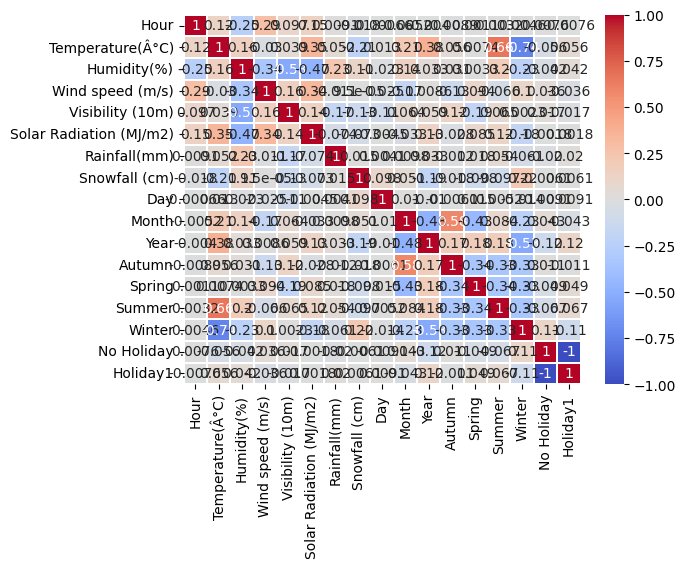

In [316]:
import seaborn as sns

data_corr= X_train.corr()   
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white') 

In [347]:
X_train.drop(columns=['Dew point temperature(Â°C)'],inplace=True)
X_test.drop(columns=['Dew point temperature(Â°C)'],inplace=True)

In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2

y_train = np.array(y_train).reshape((len(y_train),))

fs = SelectKBest(score_func=f_regression, k=12)
fs.fit(X_train, y_train)
# print(fs.get_feature_names_out)
X_train_new = fs.transform(X_train)
X_test_new = fs.transform(X_test)
X_train_new[:5]

array([[ 5.000e+00,  1.020e+01,  7.300e+01,  1.137e+03,  5.500e+00,
         0.000e+00,  0.000e+00,  2.018e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00],
       [ 7.000e+00,  1.510e+01,  8.000e+01,  6.230e+02,  1.160e+01,
         1.000e-02,  0.000e+00,  2.018e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00],
       [ 8.000e+00,  1.710e+01,  5.700e+01,  7.920e+02,  8.500e+00,
         1.210e+00,  0.000e+00,  2.018e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00],
       [ 2.200e+01,  2.700e+00,  8.800e+01,  6.210e+02,  9.000e-01,
         0.000e+00,  0.000e+00,  2.018e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00],
       [ 1.700e+01,  6.300e+00,  5.000e+01,  7.070e+02, -3.300e+00,
         6.400e-01,  0.000e+00,  2.018e+03,  0.000e+00,  0.000e+00,
         0.000e+00,  1.000e+00]])

In [37]:
# X_train.head()
X_train['Dew point temperature(Â°C)'].head()

0     5.5
1    11.6
2     8.5
3     0.9
4    -3.3
Name: Dew point temperature(Â°C), dtype: float64

In [364]:
X_train.drop(columns=['Functioning Day'],inplace=True)
X_test.drop(columns=['Functioning Day'],inplace=True)
X_train.drop(columns=['Dew point temperature(Â°C)'],inplace=True)
X_test.drop(columns=['Dew point temperature(Â°C)'],inplace=True)

In [322]:
X_train['Wind speed (m/s)']=np.sqrt(X_train['Wind speed (m/s)'])
X_test['Wind speed (m/s)']=np.sqrt(X_test['Wind speed (m/s)'])

y_train = np.sqrt(y_train)

In [323]:
X_train.head()

,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,5,10.2,73,0.894427,1137,0.00,0.0,0.0,1.0,1.0,26,4,2018
1,7,15.1,80,1.000000,623,0.01,0.0,0.0,1.0,1.0,2,4,2018
2,8,17.1,57,1.303840,792,1.21,0.0,0.0,1.0,1.0,25,5,2018
3,22,2.7,88,1.414214,621,0.00,0.0,0.0,1.0,1.0,8,4,2018
4,17,6.3,50,2.097618,707,0.64,0.0,0.0,1.0,1.0,6,4,2018


In [374]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

y_train = np.array(y_train).reshape((len(y_train),))
k_fold = KFold(n_splits=5, random_state=42, shuffle=True)

# model = Ridge()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)
# score = r2_score(y_train, y_pred)
# print(score)

# model = SVR(kernel="poly", C=0.9, epsilon=0.01)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)
# score = r2_score(y_train, y_pred)
# print(score)

# model = ElasticNet(alpha=0.001)

# model = RandomForestRegressor(n_estimators=500, max_features="sqrt" ,random_state=100) # best one 0.86 on test
# model.fit(X_train_new, y_train)
# y_pred = model.predict(X_train_new)
# score = r2_score(y_train, y_pred)
# print(score)

# accuracies = []

# for k, (train, valid) in enumerate(k_fold.split(X_train_new, y_train)):
#     model.fit(X_train_new[train], y_train[train])
#     y_pred = model.predict(X_train_new[valid])
#     accuracies.append(r2_score(y_train[valid], y_pred))

# print(accuracies)
# print(np.mean(accuracies))

# model = AdaBoostRegressor(n_estimators=500,base_estimator=DecisionTreeRegressor(max_depth=30, random_state=100) ,random_state=100) # best one 0.86 on test
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)
# score = r2_score(y_train, y_pred)
# print(score) # with test data only got 0.84

# model = SGDRegressor(loss='epsilon_insensitive', penalty='elasticnet', alpha=0.001, max_iter=5000, shuffle=True, verbose=0, random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)
# score = r2_score(y_train, y_pred)
# print(score)

# model = XGBRegressor(n_estimators=500, random_state=100, learning_rate=0.1, max_depth=10) #0.9532

accuracies = []
model = XGBRegressor(random_state=100, n_estimators=600,max_depth=9,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,alpha=0.1,eta=0.05) #0.8946
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0, random_state=100)
# model = XGBRegressor(n_estimators=800, max_depth=9, eta=0.01, subsample=0.7, colsample_bytree=1, random_state=100)
# model = XGBRegressor(n_estimators=800, learning_rate=0.01)

# {'alpha': 0.1,
#  'colsample_bytree': 1,
#  'eta': 0.01,
#  'max_depth': 9,
#  'n_estimators': 800,
#  'subsample': 0.7}

for k, (train, valid) in enumerate(k_fold.split(X_train_new, y_train)):
    model.fit(X_train_new[train], y_train[train])
    y_pred = model.predict(X_train_new[valid])
    accuracies.append(r2_score(y_train[valid], y_pred))

print(accuracies)
print(np.mean(accuracies))

model = XGBRegressor(random_state=100, n_estimators=600,max_depth=9,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,alpha=0.1,eta=0.05) #0.95 diff
# model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0, random_state=100)
# model = XGBRegressor(n_estimators=800, max_depth=9, eta=0.01, subsample=0.7, colsample_bytree=1, random_state=100) #0.897
# model = XGBRegressor(n_estimators=800, learning_rate=0.01)

model.fit(X_train_new, y_train)
y_pred = model.predict(X_train_new)
score = r2_score(y_train, y_pred)
print(score)

# model = GradientBoostingRegressor(random_state=100) # 0.9635
# model = GradientBoostingRegressor(random_state=100, learning_rate=0.1,loss='squared_error',max_depth=6,min_samples_split=10,n_estimators=250) #0.9582
# model.fit(X_train_new, y_train)
# y_pred = model.predict(X_train_new)
# score = r2_score(y_train, y_pred)
# print(score)


# final_model = RandomForestRegressor(n_estimators=500, max_features="sqrt" ,random_state=100) # best one 0.86 on test
# final_model.fit(X_train_new, y_train)
# y_pred = final_model.predict(X_train_new)
# score = r2_score(y_train, y_pred)
# print(score)

[0.8761216226476785, 0.9020926403546036, 0.9011461523414928, 0.9132307461033309, 0.8953037704651476]
0.8975789863824506
0.9996742876852152


In [375]:
y_pred_test = model.predict(X_test_new)
y_test_max = pd.read_csv("yTest_xgb_new.csv", encoding="unicode_escape")
y_test_max = y_test_max.drop(['Index'], axis=1)
y_test_max = np.array(y_test_max).reshape((len(y_test_max),))

# print(y_pred_test.shape)
# print(y_test_max.shape)

score = r2_score(y_test_max, y_pred_test)
print(score)

0.7875273550444517


In [376]:
import csv

y_pred_test = model.predict(X_test_new)
y_pred_test[y_pred_test < 0] = 0

with open("yTest_xgb_new2.csv", "w", encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(["Index", "Rented Bike Count"])
    for ind, y_val in enumerate(y_pred_test):
        writer.writerow([ind, y_val])
        # break

In [335]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import RFE

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)



scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

y_train = np.array(y_train).reshape((len(y_train),))

# model = RandomForestRegressor(random_state=100) # 88.4 training # {'max_depth': 25, 'max_features': 0.5, 'n_estimators': 500}
# hyper_params = {'n_estimators': [450, 500], 'max_features': [0.5, 0.6], 'max_depth': [22, 25, 27, 30]} # RF 

# model = GradientBoostingRegressor(random_state=100) # 88.54 {'learning_rate': 0.1,'loss': 'squared_error','max_depth': 6,'min_samples_split': 10,'n_estimators': 250}
# hyper_params = {'n_estimators': [250,400,500], 'max_depth': [6,10,15], 'min_samples_split': [10], 'learning_rate': [0.01, 0.1, 1], 'loss': ['squared_error', 'huber', 'quantile']}

model = XGBRegressor(random_state=100)
hyper_params = {'n_estimators': [600,800,100], 'max_depth': [7,9], 'subsample': [0.7,1], 'colsample_bytree': [0,1], 'alpha': [0.1], 'eta': [0.05, 0.01]} 
#0.891 std and min-max all ord
# hyper_params = {}

# model = RandomForestRegressor(n_estimators=500, max_features="sqrt" ,random_state=100)
# model.fit(X_train_new, y_train)
# rfe = RFE(model) 

model_cv = GridSearchCV(estimator = model, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True, error_score='raise', n_jobs=-1)
model_cv.fit(X_train_new, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/ashutoshgandhi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ashutoshgandhi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/ashutoshgandhi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, impo...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=100, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.1], 'colsample_bytree': [0, 1],
                         'eta': [0.05, 0.01], 'max_depth': [7, 9],
                         'n_estimators': [600, 800, 100],
                         'subsample': [0.7, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [336]:
model_cv.best_estimator_

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.01,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, ...)

In [337]:
model_cv.best_score_

0.8746369227981244

In [329]:
model_cv.best_params_

{'alpha': 0.1,
 'colsample_bytree': 1,
 'eta': 0.05,
 'max_depth': 7,
 'n_estimators': 800,
 'subsample': 0.7}

In [143]:
from sklearn.feature_selection import RFE

hyper_params = [{'n_features_to_select': list(range(1, 16))}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# select all 20
# model = GradientBoostingRegressor(random_state=100, learning_rate=0.1,loss='squared_error',max_depth=6,min_samples_split=10,n_estimators=250)

# model = RandomForestRegressor(random_state=100, max_depth=25, max_features=0.5, n_estimators=500)
model = XGBRegressor(random_state=100, n_estimators=600,max_depth=9,min_child_weight=1,subsample=1,colsample_bytree=1,alpha=0.1,eta=0.05)

model.fit(X_train_new, y_train)
rfe = RFE(model)

model_cv2 = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True, n_jobs=-1) 
model_cv2.fit(X_train_new, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=XGBRegressor(alpha=0.1, base_score=0.5,
                                                  booster='gbtree',
                                                  callbacks=None,
                                                  colsample_bylevel=1,
                                                  colsample_bynode=1,
                                                  colsample_bytree=1,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eta=0.05, eval_metric=None,
                                                  feature_types=None, gamma=0,
                                                  gpu_id=-1,
                                                  grow_policy='depthw...
                                                  learning_rate=0.0500000007,
                                                  max_bin=256,
                                                  max_cat_threshold=64,
                                                  max_cat_to_onehot=4,
                                                  max_delta_step=0, max_depth=9,
                                                  max_leaves=0,
                                                  min_child_weight=1,
                                                  missing=nan,
                                                  monotone_constraints='()',
                                                  n_estimators=600, n_jobs=0,
                                                  num_parallel_tree=1, ...)),
             n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15]}],
             return_train_score=True, scoring='r2', verbose=1)

In [146]:
model_cv2.best_params_
# model_cv2.best_score_

{'n_features_to_select': 12}

In [179]:
model_cv2.best_estimator_

RFE(estimator=XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree',
                           callbacks=None, colsample_bylevel=1,
                           colsample_bynode=1, colsample_bytree=1,
                           early_stopping_rounds=None, enable_categorical=False,
                           eta=0.05, eval_metric=None, feature_types=None,
                           gamma=0, gpu_id=-1, grow_policy='depthwise',
                           importance_type=None, interaction_constraints='',
                           learning_rate=0.0500000007, max_bin=256,
                           max_cat_threshold=64, max_cat_to_onehot=4,
                           max_delta_step=0, max_depth=9, max_leaves=0,
                           min_child_weight=1, missing=nan,
                           monotone_constraints='()', n_estimators=600,
                           n_jobs=0, num_parallel_tree=1, ...),
    n_features_to_select=12)

In [128]:
model_cv.predict(X_train)
score = r2_score(y_train, y_pred)
print(score)

0.4491544132278399


In [64]:
X_test_new.shape

(2628, 16)

In [96]:
y_pred_test = model_cv2.predict(X_test_new)

In [97]:
y_pred_test.shape

(2628,)

In [98]:
import csv

with open("yTest.csv", "w", encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(["Index", "Rented Bike Count"])
    for ind, y_val in enumerate(y_pred_test):
        writer.writerow([ind, y_val])
        # break